<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Shape: (2000, 26)

Data Sample:
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type

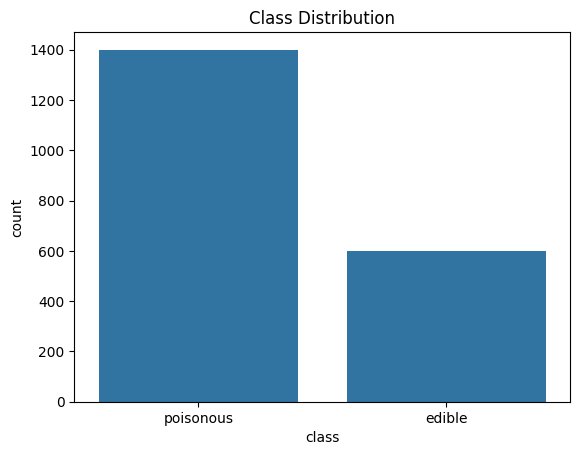

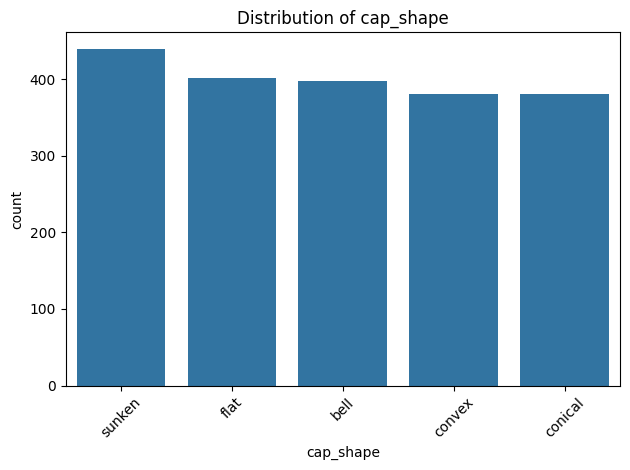

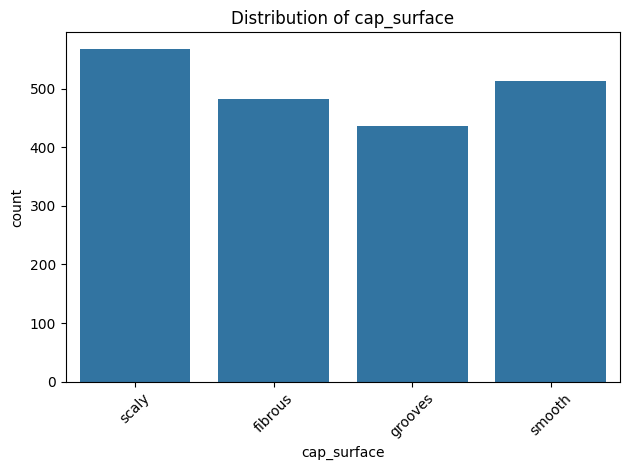

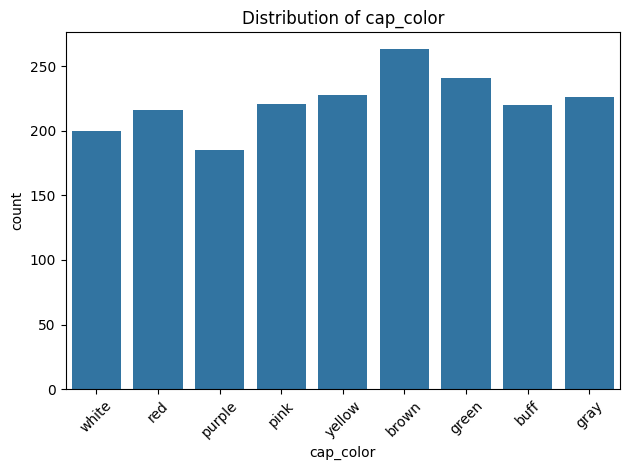

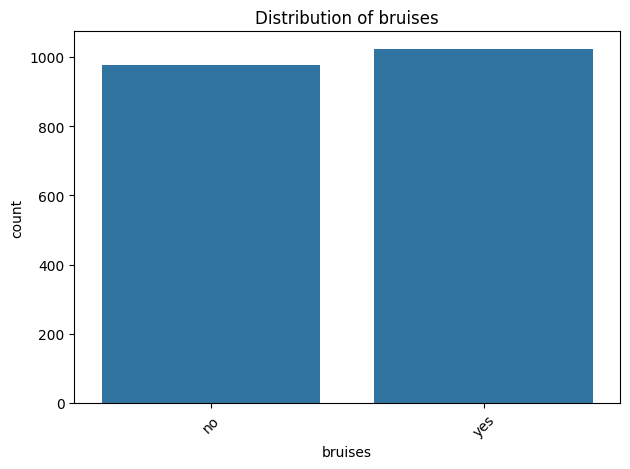

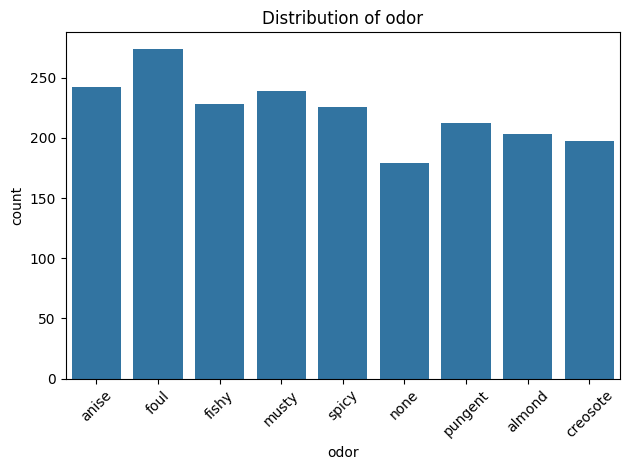

In [27]:
# Task 1: Exploratory Data Analysis (EDA)
# Load dataset
df = pd.read_csv('mushroom.csv')
df.columns = df.columns.str.strip()  # Remove any extra spaces from column names
print("Data Shape:", df.shape)
print("\nData Sample:\n", df.head())
print("\nColumn Names:\n", df.columns)

# Rename target column if necessary (assumes the first column is the target)
if 'class' not in df.columns:
    df.rename(columns={df.columns[0]: 'class'}, inplace=True)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Plot class distribution
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

# Plot feature distributions (first few features only for brevity)
for column in df.columns[1:6]:
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [28]:
# Task 2: Data Preprocessing
# Encode all categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


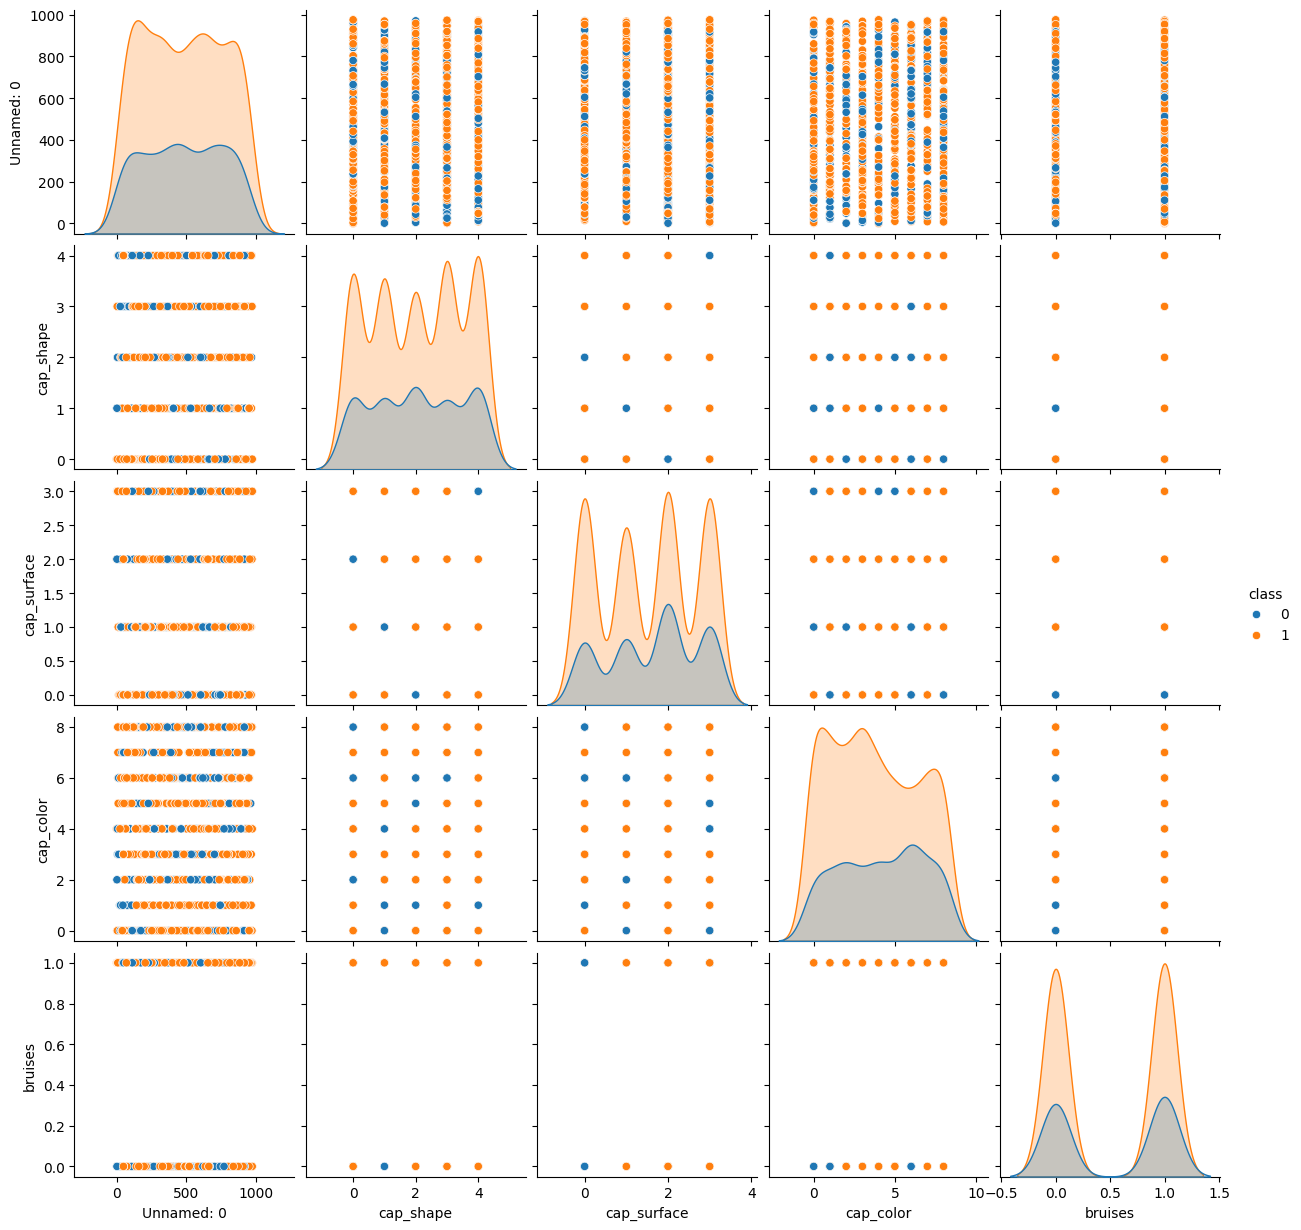

In [30]:
# Task 3: Data Visualization (after encoding)
encoded_df = df.copy()  # already encoded at this point
sns.pairplot(encoded_df.iloc[:, :5].join(encoded_df['class']), hue='class')
plt.show()


In [32]:
# Task 4: SVM Implementation
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6675

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix:
 [[  0 133]
 [  0 267]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


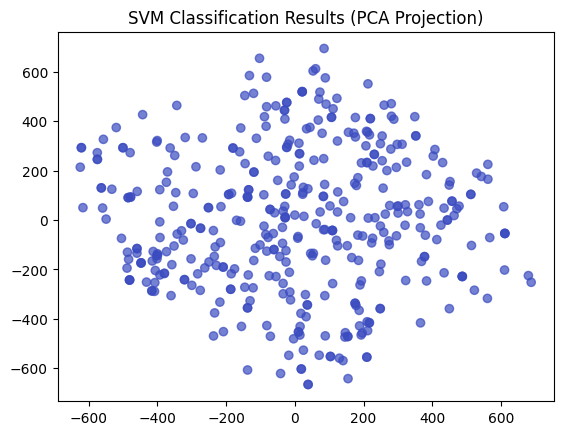

In [33]:
# Task 5: Visualization of SVM Results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title('SVM Classification Results (PCA Projection)')
plt.show()

In [34]:
# Task 6: Parameter Tuning
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")

Kernel: linear, Accuracy: 0.6675
Kernel: poly, Accuracy: 0.6675
Kernel: rbf, Accuracy: 0.6675
Kernel: sigmoid, Accuracy: 0.5325
